In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('../data/ceidg_data_surv.csv')

classesdf = pd.read_csv('../data/classes.csv')
divisionsdf = pd.read_csv('../data/divisions.csv')
groupsdf = pd.read_csv('../data/groups.csv')
sections = pd.read_csv('../data/sections.csv')
df


,Status,YearOfStartingOfTheBusiness,DateOfStartingOfTheBusiness,DateOfTermination,Terminated,DurationOfExistenceInMonths,MainAddressVoivodeship,MainAddressCounty,MainAddressTERC,CorrespondenceAddressVoivodeship,...,HasPolishCitizenship,ShareholderInOtherCompanies,PKDMainSection,PKDMainDivision,PKDMainGroup,PKDMainClass,NoOfUniquePKDSections,NoOfUniquePKDDivsions,NoOfUniquePKDGroups,NoOfUniquePKDClasses
0,Aktywny,2011,2011-10-12,NaN,0,98,DOLNOŚLĄSKIE,WROCłAWSKI,223052.0,DOLNOŚLĄSKIE,...,True,False,M,70.0,702.0,7022.0,2,3,5,6
1,Wykreślony,2011,2011-01-01,2015-08-06,1,55,MAZOWIECKIE,WARSZAWA,1465078.0,MAZOWIECKIE,...,True,False,F,43.0,432.0,4322.0,1,1,1,1
2,Wykreślony,2011,2011-06-01,2017-06-29,1,72,MAZOWIECKIE,WARSZAWA,1465011.0,MAZOWIECKIE,...,True,False,Q,86.0,862.0,8623.0,1,1,2,2
3,Wykreślony,2011,2011-12-15,2014-12-19,1,36,MAZOWIECKIE,WARSZAWA,1465078.0,MAZOWIECKIE,...,True,False,F,43.0,432.0,4321.0,2,2,2,2
4,Wykreślony,2011,2011-02-01,2012-03-06,1,13,MAZOWIECKIE,WARSZAWA,1465108.0,MAZOWIECKIE,...,True,False,G,47.0,479.0,4791.0,2,3,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287021,Wykreślony,2011,2011-04-01,2013-05-01,1,25,ŁÓDZKIE,WIERUSZOWSKI,1018074.0,ŁÓDZKIE,...,True,False,G,47.0,477.0,4771.0,4,5,7,14
287022,Wykreślony,2011,2011-11-01,2013-09-02,1,22,ŁÓDZKIE,WIERUSZOWSKI,1018042.0,ŁÓDZKIE,...,True,False,G,47.0,479.0,4791.0,4,4,6,8
287023,Wykreślony,2011,2011-06-10,2015-09-22,1,51,ŁÓDZKIE,WIERUSZOWSKI,1018074.0,ŁÓDZKIE,...,True,False,G,46.0,467.0,4673.0,2,3,5,10
287024,Wykreślony,2011,2011-07-04,2012-06-26,1,11,ŁÓDZKIE,WIERUSZOWSKI,1018012.0,ŁÓDZKIE,...,True,False,F,43.0,433.0,4331.0,2,3,3,7


In [17]:
terminated = df[df.Terminated==1]
notTerminated = df[df.Terminated==0]
mean = terminated[['DurationOfExistenceInMonths']].mean()
print("Średnia długość życia firmy przed upadkiem: " + str(mean[0]) + " miesięcy")

print("Upadło " + str(len(terminated.index) / len(df.index) * 100) + "% firm")

Średnia długość życia firmy przed upadkiem: 37.4670353485506 miesięcy
Upadło 66.71625567021803% firm


In [18]:
df["MainAddressVoivodeship"].value_counts()

MAZOWIECKIE              44788
WIELKOPOLSKIE            27098
ŚLĄSKIE                  20914
POMORSKIE                20669
MAŁOPOLSKIE              18505
                         ...  
GORZÓW WLKP.                 1
ZACHONDIOPOMORSKIE           1
POMORSKI                     1
WARMIńSKO-MAZURSKIEGO        1
KOBYLANKA                    1
Name: MainAddressVoivodeship, Length: 73, dtype: int64

In [19]:
foreignCompanies = df[df.HasPolishCitizenship == False]
foreignTerminatedCompanies = foreignCompanies[foreignCompanies.Terminated == True]

print("Wśrod firm założonych przez osobę bez polskiego obywatelstwa upadło: " + str(len(foreignTerminatedCompanies.index) / len(foreignCompanies.index) * 100) + "% firm")

polishCompanies = df[df.HasPolishCitizenship == True]
polishTerminatedCompanies = polishCompanies[polishCompanies.Terminated == True]

print("Wśrod firm założonych przez osobę z polskim obywatelstwem upadło: " + str(len(polishTerminatedCompanies.index) / len(polishCompanies.index) * 100) + "% firm")

shareholders = df[df.ShareholderInOtherCompanies == True]
terminatedShareholders = shareholders[shareholders.Terminated == True]

print("Wśrod firm założonych przez osoby które posiadają udziały w innych firmach upadło: " + str(len(terminatedShareholders.index) / len(shareholders.index) * 100) + "% firm")


Wśrod firm założonych przez osobę bez polskiego obywatelstwa upadło: 78.62742492692001% firm
Wśrod firm założonych przez osobę z polskim obywatelstwem upadło: 66.05704957091487% firm
Wśrod firm założonych przez osoby które posiadają udziały w innych firmach upadło: 13.853736512588252% firm


HANDEL HURTOWY I DETALICZNY; NAPRAWA POJAZDÓW SAMOCHODOWYCH, WŁĄCZAJĄC MOTOCYKLE             57880
BUDOWNICTWO                                                                                  34670
PRZETWÓRSTWO PRZEMYSŁOWE                                                                     14487
DZIAŁALNOŚĆ PROFESJONALNA, NAUKOWA I TECHNICZNA                                              13471
TRANSPORT I GOSPODARKA MAGAZYNOWA                                                            11416
POZOSTAŁA DZIAŁALNOŚĆ USŁUGOWA                                                                9146
DZIAŁALNOŚĆ ZWIĄZANA Z ZAKWATEROWANIEM I USŁUGAMI GASTRONOMICZNYMI                            8719
DZIAŁALNOŚĆ FINANSOWA I UBEZPIECZENIOWA                                                       8637
DZIAŁALNOŚĆ W ZAKRESIE USŁUG ADMINISTROWANIA I DZIAŁALNOŚĆ WSPIERAJĄCA                        8042
OPIEKA ZDROWOTNA I POMOC SPOŁECZNA                                                            5953
EDUKACJA  

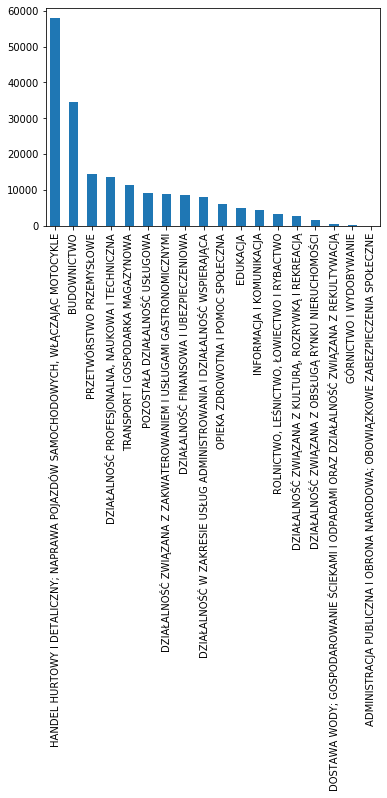

In [20]:
mostTerminatedSections = terminated.set_index('PKDMainSection').join(sections.set_index('pkdCode'))['section'].value_counts()

print(mostTerminatedSections)
mostTerminatedSections.plot.bar()

HANDEL HURTOWY I DETALICZNY; NAPRAWA POJAZDÓW SAMOCHODOWYCH, WŁĄCZAJĄC MOTOCYKLE             21077
DZIAŁALNOŚĆ PROFESJONALNA, NAUKOWA I TECHNICZNA                                              12965
BUDOWNICTWO                                                                                  12732
OPIEKA ZDROWOTNA I POMOC SPOŁECZNA                                                            8793
PRZETWÓRSTWO PRZEMYSŁOWE                                                                      7859
TRANSPORT I GOSPODARKA MAGAZYNOWA                                                             6394
POZOSTAŁA DZIAŁALNOŚĆ USŁUGOWA                                                                4237
INFORMACJA I KOMUNIKACJA                                                                      4067
DZIAŁALNOŚĆ W ZAKRESIE USŁUG ADMINISTROWANIA I DZIAŁALNOŚĆ WSPIERAJĄCA                        3441
EDUKACJA                                                                                      3038
DZIAŁALNOŚ

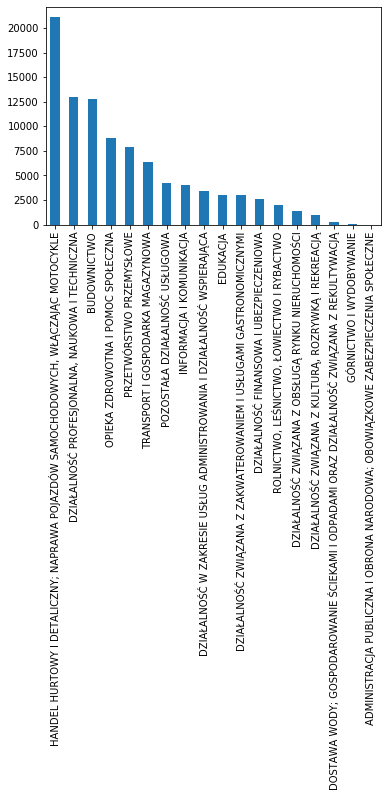

In [21]:
leastTerminatedSections = notTerminated.set_index('PKDMainSection').join(sections.set_index('pkdCode'))['section'].value_counts()

print(leastTerminatedSections)
leastTerminatedSections.plot.bar()

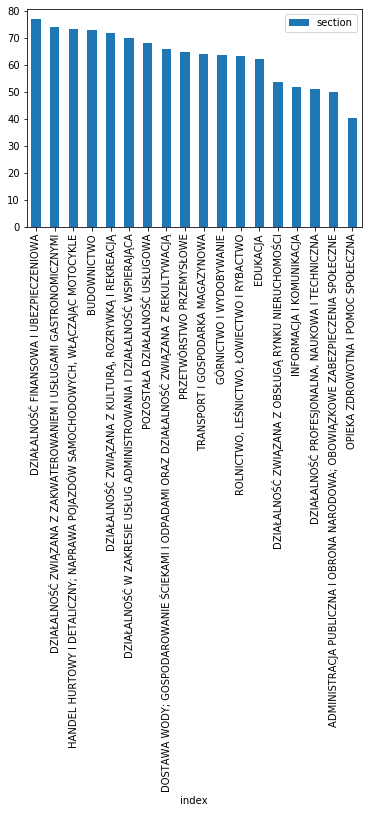

In [22]:
allcount  = df.set_index('PKDMainSection').join(sections.set_index('pkdCode'))['section'].value_counts().rename_axis('pkdCode')


terminatedRatio = terminated.set_index('PKDMainSection').join(sections.set_index('pkdCode'))['section'].value_counts().divide(allcount).multiply(100)
terminatedRatio = (terminatedRatio.to_frame().reset_index()).sort_values('section', ascending=False)

terminatedRatio.plot.bar(x='index', y='section')

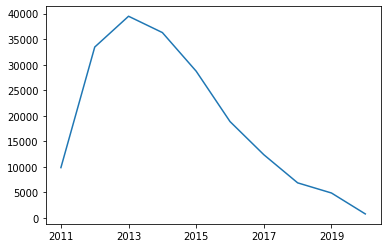

In [23]:
terminated["TerminationYear"] = terminated["DateOfTermination"].str.extract(r'(^\w{4})')
terminationYears = terminated["TerminationYear"].value_counts().sort_index(ascending=True)
terminationYears.plot.line()

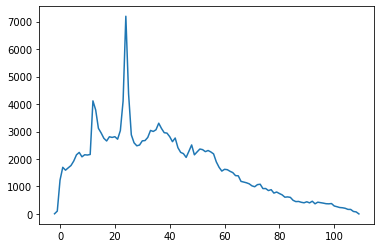

In [24]:
terminationMonths = terminated["DurationOfExistenceInMonths"].value_counts().sort_index(ascending=True)
terminationMonths.plot.line()

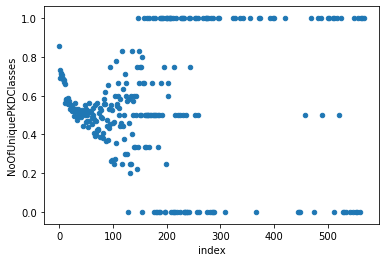

In [25]:
terminatedPkdClasses = terminated["NoOfUniquePKDClasses"].value_counts().sort_index()
allPkdClasses = df["NoOfUniquePKDClasses"].value_counts().sort_index()

terminatedPkdClasses.divide(allPkdClasses).fillna(0).to_frame().reset_index().plot.scatter(x='index', y='NoOfUniquePKDClasses')

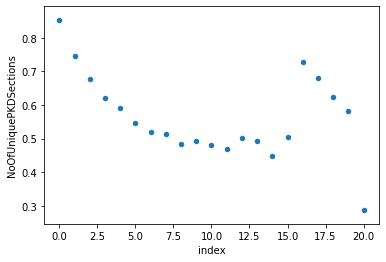

In [26]:
terminatedPkdSections = terminated["NoOfUniquePKDSections"].value_counts().sort_index()
allPkdSections = df["NoOfUniquePKDSections"].value_counts().sort_index()

terminatedPkdSections.divide(allPkdSections).fillna(0).to_frame().reset_index().plot.scatter(x='index', y='NoOfUniquePKDSections')